In [123]:
import pandas as pd

df = pd.read_csv('Cargo Volume - Train.csv')
df_t = pd.read_csv('Cargo Volume - Test.csv')
df

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Cargo Type Code,Cargo Aircraft Type,Cargo Metric TONS
0,201601,Sun Country Airlines,SY,Sun Country Airlines,SY,Domestic,US,Enplaned,Cargo,Passenger,8.871509
1,200811,United Airlines,UA,United Airlines,UA,Domestic,US,Deplaned,Cargo,Passenger,53.946194
2,200709,Qantas Airways,QF,Qantas Airways,QF,International,Australia / Oceania,Deplaned,Express,Passenger,0.043999
3,201608,Philippine Airlines,PR,Philippine Airlines,PR,International,Asia,Deplaned,Mail,Passenger,19.023530
4,201708,Singapore Airlines,SQ,Singapore Airlines,SQ,International,Asia,Deplaned,Express,Passenger,6.951420
...,...,...,...,...,...,...,...,...,...,...,...
27225,201108,United Airlines - Pre 07/01/2013,UA,United Airlines - Pre 07/01/2013,UA,International,Canada,Enplaned,Express,Passenger,5.687690
27226,200703,Asiana Airlines,OZ,Asiana Airlines,OZ,International,Asia,Deplaned,Mail,Freighter,3.473669
27227,201204,US Airways,US,US Airways,US,Domestic,US,Deplaned,Cargo,Passenger,18.564941
27228,201005,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Cargo,Passenger,9.814090


### First this is a regression task.  The  metric for quantifying performance of a model here is to use mean square error (MSE).  We want to make sure the difference between the prediction and the ground-truth as close as possible. It penalizes more when having large prediction error. And at the same time, it's very easy to undestand and easy to optimize. However, we don't think this is the unique metric. Mean Absolute Error, or maybe success rate (for example in 10% threshold of GT) are both very good metric. In reality, we should look at our algorithms in various evaluation metrics to justify it can work well. 

### Analyze the distributions of each features.  

In [124]:
num_features = 10
for i in range(num_features):
    print(df.iloc[:, i].value_counts())


201909    175
201906    173
201905    173
201907    172
201908    172
         ... 
201406    121
202007    120
202006    105
202005     94
202004     91
Name: Activity Period, Length: 186, dtype: int64
United Airlines                            2551
United Airlines - Pre 07/01/2013           2014
Korean Air Lines                           1184
Alaska Airlines                            1055
China Airlines                              971
                                           ... 
Total Airport Services, Inc. (Inactive)       3
Mesaba Airlines                               3
Air Canada Jazz                               2
Qatar Airways                                 2
Focus Air                                     2
Name: Operating Airline, Length: 94, dtype: int64
UA    4565
KE    1184
AS    1055
CI     971
OZ     969
      ... 
5X       5
VX       5
XJ       3
QR       2
QK       2
Name: Operating Airline IATA Code, Length: 87, dtype: int64
United Airlines                       

### analyze the distribution of the Cargo Metric TONS, as you can see most values are in the range < 2000, while the remaining small amount can reach a really large value like 10000

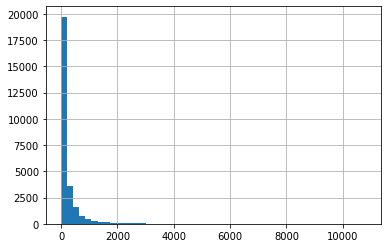

In [125]:
hist = df['Cargo Metric TONS'].hist(bins=50)

### Apply binary encoding to feature 1: 9 as they are nominal categorical feature. It should be the same as one-hot encoding for decision tree based method. 

In [126]:

import category_encoders as ce
X = pd.DataFrame()
X_t = pd.DataFrame()
for i in range(1, 10):
    f = df.iloc[:, i]
    encoder = ce.BinaryEncoder()
    encoder.fit(f)
    f_enc = encoder.transform(f)
    X = pd.concat([X, f_enc], axis = 1)
    
    f_t = df_t.iloc[:, i]
    f_t_enc = encoder.transform(f_t)
    X_t = pd.concat([X_t, f_t_enc], axis = 1)
X_t 

/Users/zhaotingye/.pyenv/versions/3.7.7/envs/py377/lib/python3.7/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/Users/zhaotingye/.pyenv/versions/3.7.7/envs/py377/lib/python3.7/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/Users/zhaotingye/.pyenv/versions/3.7.7/envs/py377/lib/python3.7/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/Users/zhaotingye/.pyenv/versions/3.7.7/envs/py377/lib/python3.7/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future v

,Operating Airline_0,Operating Airline_1,Operating Airline_2,Operating Airline_3,Operating Airline_4,Operating Airline_5,Operating Airline_6,Operating Airline_7,Operating Airline IATA Code_0,Operating Airline IATA Code_1,...,GEO Region_3,GEO Region_4,Activity Type Code_0,Activity Type Code_1,Cargo Type Code_0,Cargo Type Code_1,Cargo Type Code_2,Cargo Aircraft Type_0,Cargo Aircraft Type_1,Cargo Aircraft Type_2
0,0,0,0,0,0,0,1,0,0,0,...,0,1,1,0,0,1,1,0,0,1
1,0,0,0,0,0,1,1,0,0,0,...,1,1,1,0,0,0,1,0,1,0
2,0,0,1,0,1,0,1,0,0,0,...,1,1,0,1,0,0,1,0,0,1
3,0,0,1,0,1,0,1,0,0,0,...,1,1,1,0,0,0,1,0,0,1
4,0,1,0,0,0,0,0,0,0,0,...,1,1,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6802,0,0,1,0,0,0,1,0,0,0,...,1,0,0,1,0,1,1,0,0,1
6803,0,0,1,0,0,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
6804,0,0,0,1,0,1,1,0,0,0,...,1,0,1,0,0,1,1,0,0,1
6805,0,1,0,1,0,0,0,1,0,1,...,0,1,0,1,0,0,1,0,1,0


### For feature 0, first convert month to year and then normalize it. Also according to the plot (year vs cargo metric tons), we can see there is a sharp decrease starting 2018. One assumption is that it's due to the financial crisis

,Operating Airline_0,Operating Airline_1,Operating Airline_2,Operating Airline_3,Operating Airline_4,Operating Airline_5,Operating Airline_6,Operating Airline_7,Operating Airline IATA Code_0,Operating Airline IATA Code_1,...,GEO Region_4,Activity Type Code_0,Activity Type Code_1,Cargo Type Code_0,Cargo Type Code_1,Cargo Type Code_2,Cargo Aircraft Type_0,Cargo Aircraft Type_1,Cargo Aircraft Type_2,year
0,0,0,0,0,0,0,1,0,0,0,...,1,1,0,0,1,1,0,0,1,-0.815743
1,0,0,0,0,0,1,1,0,0,0,...,1,1,0,0,0,1,0,1,0,1.510819
2,0,0,1,0,1,0,1,0,0,0,...,1,0,1,0,0,1,0,0,1,-0.372588
3,0,0,1,0,1,0,1,0,0,0,...,1,1,0,0,0,1,0,0,1,1.215382
4,0,1,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,1,0,-0.963461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6802,0,0,1,0,0,0,1,0,0,0,...,0,0,1,0,1,1,0,0,1,0.661439
6803,0,0,1,0,0,1,0,1,0,0,...,0,0,1,0,0,1,0,0,1,1.455424
6804,0,0,0,1,0,1,1,0,0,0,...,0,1,0,0,1,1,0,0,1,0.439862
6805,0,1,0,1,0,0,0,1,0,1,...,1,0,1,0,0,1,0,1,0,-0.557236


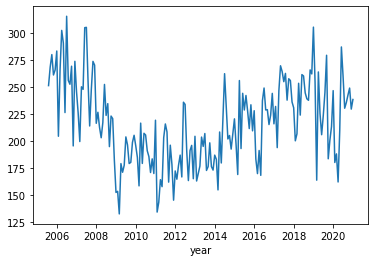

In [127]:
df['year'] = (df['Activity Period'] / 100).apply(np.floor) + (df['Activity Period'] % 100)/12
df.groupby('year').mean()['Cargo Metric TONS'].plot()

df_t['year'] = (df_t['Activity Period'] / 100).apply(np.floor) + (df_t['Activity Period'] % 100)/12


from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(df['year'].values.reshape(-1, 1))

X_year_scaled = scaler.transform(df['year'].values.reshape(-1, 1))
X_pd = pd.DataFrame(X_year_scaled, columns=['year'])
X = pd.concat([X, X_pd], axis = 1)

X_t_pd = pd.DataFrame(scaler.transform(df_t['year'].values.reshape(-1, 1)), columns=['year'])
X_t = pd.concat([X_t, X_t_pd], axis = 1)
X_t

### It's obvious that this is a regression problem, so I decide to go with the regression-based ML algorithm. Frist I start with Linear regression. Then I found out due to very skew Cargo Metric TONS distributions (as you can see in the histgram plot above), Linear regression doesn't work that well. The super large cargo metric tons values are somehow similar as outliers, and LR is very sensitive to them. Because of it, so I decide to move forward to use random forest. The model is more complex and powerful. Compared with decision tree, it can reduce the overfitting problem of decision tree. So it's a prefered model here used.   

In [136]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### Try linear regression for comparision 

In [137]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
reg = LinearRegression()
reg.fit(X_train, Y_train)

mse = mean_squared_error(Y_train, reg.predict(X_train))
mae = mean_absolute_error(Y_train, reg.predict(X_train))
rmse = math.sqrt(mse)
print("LR Train: mse " + str(mse) + " mae " + str(mae) + " rmse " + str(rmse))

mse = mean_squared_error(Y_test, reg.predict(X_test))
mae = mean_absolute_error(Y_test, reg.predict(X_test))
rmse = math.sqrt(mse)
print("LR Test: mse " + str(mse) + " mae " + str(mae) + " rmse " + str(rmse))

LR Train: mse 138228.57639819552 mae 207.28166872752482 rmse 371.7910386200769
LR Test: mse 142863.2111044215 mae 208.0307527446566 rmse 377.9725004605778


In [141]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor()
reg.fit(X_train, Y_train)

RandomForestRegressor()

In [142]:
mse = mean_squared_error(Y_train, reg.predict(X_train))
mae = mean_absolute_error(Y_train, reg.predict(X_train))
rmse = math.sqrt(mse)
print("Random Forest Train: mse " + str(mse) + " mae " + str(mae) + " rmse " + str(rmse))

mse = mean_squared_error(Y_test, reg.predict(X_test))
mae = mean_absolute_error(Y_test, reg.predict(X_test))
rmse = math.sqrt(mse)
print("Random Forest Test: mse " + str(mse) + " mae " + str(mae) + " rmse " + str(rmse))

Random Forest Train: mse 2749.1673310775263 mae 16.196004472506978 rmse 52.432502620774514
Random Forest Test: mse 9727.764934784444 mae 41.11351273688652 rmse 98.62943239613844


### retrain using all data

In [144]:
reg = RandomForestRegressor()
reg.fit(X, Y)

mse = mean_squared_error(Y, reg.predict(X))
mae = mean_absolute_error(Y, reg.predict(X))
rmse = math.sqrt(mse)
print("Random Forest Train: mse " + str(mse) + " mae " + str(mae) + " rmse " + str(rmse))


Random Forest Train: mse 2262.5860902175136 mae 15.102629600217332 rmse 47.5666489277678


In [145]:
Y_t = reg.predict(X_t)
Y_t

df_output = pd.DataFrame(Y_t, columns = ["Cargo Metric TONS"])
df_output.to_csv('dc1.csv', index=False)  

### perform a grid search to find the best parameters, it may take a long time but this somehow doesn't work very well

In [133]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]


# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}



In [135]:
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=100, n_jobs = -1)

rf_random.fit(X_train, Y_train)
rf_random.best_params_


Fitting 3 folds for each of 100 candidates, totalling 300 fits


/Users/zhaotingye/.pyenv/versions/3.7.7/envs/py377/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


KeyboardInterrupt: 

In [120]:
rf_random.best_params_

{'n_estimators': 1400,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 70,
 'bootstrap': True}

In [121]:
best_random = rf_random.best_estimator_

mse = mean_squared_error(Y_train, best_random.predict(X_train))
mae = mean_absolute_error(Y_train, best_random.predict(X_train))
rmse = math.sqrt(mse)
print("Random Forest Train: mse " + str(mse) + " mae " + str(mae) + " rmse " + str(rmse))

mse = mean_squared_error(Y_test, best_random.predict(X_test))
mae = mean_absolute_error(Y_test, best_random.predict(X_test))
rmse = math.sqrt(mse)
print("Random Forest Test: mse " + str(mse) + " mae " + str(mae) + " rmse " + str(rmse))

Random Forest Train: mse 8280.429718276506 mae 27.74159472460541 rmse 90.99686652998831
Random Forest Test: mse 11919.803461981222 mae 44.09425453113548 rmse 109.17785243345476
